20190515
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4780 entries, 0 to 4779
Data columns (total 7 columns):
Date      4780 non-null object
Open      4780 non-null object
High      4780 non-null object
Low       4780 non-null object
Close     4780 non-null object
Volume    4780 non-null object
Change    4780 non-null object
dtypes: object(7)
memory usage: 261.5+ KB
raw_stock_info:      Open    High     Low   Close  Volume
0    Open    High     Low   Close  Volume
1  177825  180714  151373  151373  299705
2  133369  133369  133369  133368   11735
3  126700  132924  117364  117364  287096
4  103361  103361  103361  103360   12935
stock_info.shape:  (4779, 5)
stock_info[0]:  [ 177825.  180714.  151373.  151373.  299705.]
price.shape:  (4779, 4)
price[0]:  [ 177825.  180714.  151373.  151373.]
norm_price[0]:  [ 0.2683434   0.27362724  0.2660789   0.27098532]
********************************test정규화: [ 0.99999999]
********************************test정규화: [ 0.89999999]
*****************

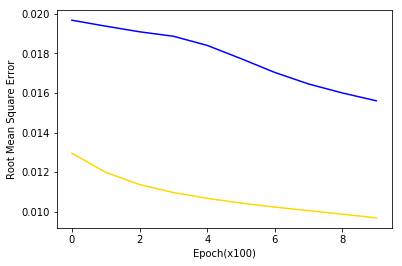

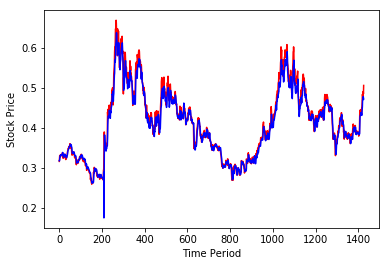

recent_data.shape: (1, 28, 5)
recent_data: [[[ 0.38873939  0.39251356  0.38496522  0.38685231  0.06505753]
  [ 0.38685231  0.38873939  0.38307814  0.38685231  0.05774925]
  [ 0.38685231  0.38873939  0.38496522  0.38685231  0.0292227 ]
  [ 0.38873939  0.39062647  0.38307814  0.38496522  0.0450112 ]
  [ 0.38496522  0.38496522  0.37741688  0.37930397  0.08473111]
  [ 0.38119105  0.38873939  0.37930397  0.38685231  0.05825162]
  [ 0.38873939  0.38873939  0.38307814  0.38685231  0.05614173]
  [ 0.38685231  0.38685231  0.38307814  0.38685231  0.03591291]
  [ 0.39251356  0.41704566  0.38873939  0.41704566  0.2718579 ]
  [ 0.42836816  0.44535192  0.42459399  0.44346484  0.38584711]
  [ 0.44157775  0.44912609  0.4359165   0.44346484  0.14447168]
  [ 0.44912609  0.45101318  0.43780358  0.43969067  0.09819981]
  [ 0.44157775  0.44912609  0.43402942  0.44157775  0.07291462]
  [ 0.44535192  0.45478734  0.44157775  0.44535192  0.10120381]
  [ 0.44723901  0.45101318  0.43780358  0.43969067  0.0573970

In [1]:
import FinanceDataReader as fdr
import tensorflow as tf
import numpy as np
import pandas as pd
import datetime
from datetime import date,timedelta
import matplotlib.pyplot as plt
import pymysql
import settings
import os
import locale
#from datetime import date,timedelta

tf.set_random_seed(777)
def data_standardization(x):
    x_np = np.asarray(x)
    return (x_np - x_np.mean()) / x_np.std()
 
# 너무 작거나 너무 큰 값이 학습을 방해하는 것을 방지하고자 정규화한다
# x가 양수라는 가정하에 최소값과 최대값을 이용하여 0~1사이의 값으로 변환
# Min-Max scaling
def min_max_scaling(x):
    x_np = np.asarray(x)
    return (x_np - x_np.min()) / (x_np.max() - x_np.min() + 1e-7) # 1e-7은 0으로 나누는 오류 예방차원
 
# 정규화된 값을 원래의 값으로 되돌린다
# 정규화하기 이전의 org_x값과 되돌리고 싶은 x를 입력하면 역정규화된 값을 리턴한다
def reverse_min_max_scaling(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()
 
 
# 하이퍼파라미터
input_data_column_cnt = 5  # 입력데이터의 컬럼 개수(Variable 개수)
output_data_column_cnt = 1 # 결과데이터의 컬럼 개수
 
seq_length = 28            # 1개 시퀀스의 길이(시계열데이터 입력 개수)
rnn_cell_hidden_dim = 20   # 각 셀의 (hidden)출력 크기
forget_bias = 1.0          # 망각편향(기본값 1.0)
num_stacked_layers = 1     # stacked LSTM layers 개수
keep_prob = 1.0            # dropout할 때 keep할 비율
 
epoch_num = 1000           # 에폭 횟수(학습용전체데이터를 몇 회 반복해서 학습할 것인가 입력)
learning_rate = 0.01       # 학습률
 
start_date = '2000-01-01' # 최근 10년간 데이터
#end_date = settings.get_today_str() # 오늘날짜
end_date = date.today() - timedelta(1) # 어제날짜
stocks = ['samsung', 'kakao','cj','lg','sk','dosan','asiana','hanhaw','hyendai','hite']

# .csv파일을 저장할 디렉토리
data_dir = os.path.join(
    settings.BASE_DIR, 'chart_data/%s' % (
        settings.get_today_str()))     # timestr : 날짜, 시간
if not os.path.isdir(data_dir):
    os.makedirs(data_dir)
    
# 추가
# samsung
#df = fdr.DataReader('005930', start_date, end_date)
#df.to_csv('./chart_data/%s/%s.csv' % (settings.get_today_str(), stocks[0]))
# kakao
df = fdr.DataReader('035720', start_date, end_date)
df.to_csv('./chart_data/%s/%s.csv' % (settings.get_today_str(), stocks[1]))


print(settings.get_today_str())
#yesterday = date.today() - timedelta(1)
#print(yesterday.strftime('%Y-%m-%d'))
#stock_file_name = 'chart_date\20190502\kakao.csv' # 아마존 주가데이터 파일
encoding = 'euc-kr' # 문자 인코딩
names = ['Date','Open','High','Low','Close','Volume','Change']


#########################################################################################################
sydtpath = os.path.join(settings.BASE_DIR, 'chart_data/%s' % (settings.get_today_str()))
#stock_code = "kakao"
fullpath = sydtpath + os.path.sep + stocks[1]  + '.csv'
#stock_code + '.csv'
raw_dataframe = pd.read_csv(fullpath, names=names, encoding=encoding) #판다스이용 csv파일 로딩
raw_dataframe.info() # 데이터 정보 출력
######################################################################################################### 
    
# raw_dataframe.drop('Date', axis=1, inplace=True) # 시간열을 제거하고 dataframe 재생성하지 않기
del raw_dataframe['Date'] # 위 줄과 같은 효과
del raw_dataframe['Change']
    

print("raw_stock_info:",raw_dataframe.head())    
    
stock_info = raw_dataframe.values[1:].astype(np.float) # 금액&거래량 문자열을 부동소수점형으로 변환한다
print("stock_info.shape: ", stock_info.shape)
print("stock_info[0]: ", stock_info[0])

# 데이터 전처리
# 가격과 거래량 수치의 차이가 많아나서 각각 별도로 정규화한다
 
# 가격형태 데이터들을 정규화한다
# ['Open','High','Low','Close','Adj Close','Volume']에서 'Adj Close'까지 취함
# 곧, 마지막 열 Volume를 제외한 모든 열
price = stock_info[:,:-1]
norm_price = min_max_scaling(price) # 가격형태 데이터 정규화 처리
print("price.shape: ", price.shape)
print("price[0]: ", price[0])
print("norm_price[0]: ", norm_price[0])
print("="*100) # 화면상 구분용
 
a = [[10],[9],[8],[6],[2],[0]]
test_price=min_max_scaling(a)
print("********************************test정규화:",test_price[0])
print("********************************test정규화:",test_price[1])
print("********************************test정규화:",test_price[2])
print("********************************test정규화:",test_price[3])
print("********************************test정규화:",test_price[4])
print("********************************test정규화:",test_price[5])

# 거래량형태 데이터를 정규화한다
# ['Open','High','Low','Close','Adj Close','Volume']에서 마지막 'Volume'만 취함
# [:,-1]이 아닌 [:,-1:]이므로 주의하자! 스칼라가아닌 벡터값 산출해야만 쉽게 병합 가능
volume = stock_info[:,-1:]
norm_volume = min_max_scaling(volume) # 거래량형태 데이터 정규화 처리
print("volume.shape: ", volume.shape)
print("volume[0]: ", volume[0])
print("norm_volume[0]: ", norm_volume[0])
print("="*100) # 화면상 구분용
 
# 행은 그대로 두고 열을 우측에 붙여 합친다
x = np.concatenate((norm_price, norm_volume), axis=1) # axis=1, 세로로 합친다
print("x.shape: ", x.shape)
print("x[0]: ", x[0])    # x의 첫 값
print("x[-1]: ", x[-1])  # x의 마지막 값
print("="*100) # 화면상 구분용
 
y = x[:, [-2]] # 타켓은 주식 종가이다
print("y[0]: ",y[0])     # y의 첫 값
print("y[-1]: ",y[-1])   # y의 마지막 값
 
 
dataX = [] # 입력으로 사용될 Sequence Data
dataY = [] # 출력(타켓)으로 사용
 
for i in range(0, len(y) - seq_length):
    _x = x[i : i+seq_length]
    _y = y[i + seq_length] # 다음 나타날 주가(정답)
    if i is 0:
        print(_x, "->", _y) # 첫번째 행만 출력해 봄
    dataX.append(_x) # dataX 리스트에 추가
    dataY.append(_y) # dataY 리스트에 추가
    

 
# 학습용/테스트용 데이터 생성
# 전체 70%를 학습용 데이터로 사용
train_size = int(len(dataY) * 0.7)
# 나머지(30%)를 테스트용 데이터로 사용
test_size = len(dataY) - train_size
 
# 데이터를 잘라 학습용 데이터 생성
trainX = np.array(dataX[0:train_size])
trainY = np.array(dataY[0:train_size])
 
# 데이터를 잘라 테스트용 데이터 생성
testX = np.array(dataX[train_size:len(dataX)])
testY = np.array(dataY[train_size:len(dataY)])
 
 
# 텐서플로우 플레이스홀더 생성
# 입력 X, 출력 Y를 생성한다
X = tf.placeholder(tf.float32, [None, seq_length, input_data_column_cnt])
print("X: ", X)
Y = tf.placeholder(tf.float32, [None, 1])
print("Y: ", Y)
 
# 검증용 측정지표를 산출하기 위한 targets, predictions를 생성한다
targets = tf.placeholder(tf.float32, [None, 1])
print("targets: ", targets)
 
predictions = tf.placeholder(tf.float32, [None, 1])
print("predictions: ", predictions)



# 모델(LSTM 네트워크) 생성
def lstm_cell():
    # LSTM셀을 생성
    # num_units: 각 Cell 출력 크기
    # forget_bias:  to the biases of the forget gate 
    #              (default: 1)  in order to reduce the scale of forgetting in the beginning of the training.
    # state_is_tuple: True ==> accepted and returned states are 2-tuples of the c_state and m_state.
    # state_is_tuple: False ==> they are concatenated along the column axis.
    cell = tf.contrib.rnn.BasicLSTMCell(num_units=rnn_cell_hidden_dim, 
                                        forget_bias=forget_bias, state_is_tuple=True, activation=tf.nn.softsign)
    if keep_prob < 1.0:
        cell = tf.contrib.rnn.DropoutWrapper(cell, output_keep_prob=keep_prob)
    return cell
 
# num_stacked_layers개의 층으로 쌓인 Stacked RNNs 생성
stackedRNNs = [lstm_cell() for _ in range(num_stacked_layers)]
multi_cells = tf.contrib.rnn.MultiRNNCell(stackedRNNs, state_is_tuple=True) if num_stacked_layers > 1 else lstm_cell()
 
# RNN Cell(여기서는 LSTM셀임)들을 연결
hypothesis, _states = tf.nn.dynamic_rnn(multi_cells, X, dtype=tf.float32)
print("hypothesis: ", hypothesis)
 
# [:, -1]를 잘 살펴보자. LSTM RNN의 마지막 (hidden)출력만을 사용했다.
# 과거 여러 거래일의 주가를 이용해서 다음날의 주가 1개를 예측하기때문에 MANY-TO-ONE형태이다
hypothesis = tf.contrib.layers.fully_connected(hypothesis[:, -1], output_data_column_cnt, activation_fn=tf.identity)
 
    
    
    

# 손실함수로 평균제곱오차를 사용한다
loss = tf.reduce_sum(tf.square(hypothesis - Y))
# 최적화함수로 AdamOptimizer를 사용한다
optimizer = tf.train.AdamOptimizer(learning_rate)
# optimizer = tf.train.RMSPropOptimizer(learning_rate) # LSTM과 궁합 별로임
 
train = optimizer.minimize(loss)
 
# RMSE(Root Mean Square Error)
# 제곱오차의 평균을 구하고 다시 제곱근을 구하면 평균 오차가 나온다
# rmse = tf.sqrt(tf.reduce_mean(tf.square(targets-predictions))) # 아래 코드와 같다
rmse = tf.sqrt(tf.reduce_mean(tf.squared_difference(targets, predictions)))
 
 
train_error_summary = [] # 학습용 데이터의 오류를 중간 중간 기록한다
test_error_summary = []  # 테스트용 데이터의 오류를 중간 중간 기록한다
test_predict = ''        # 테스트용데이터로 예측한 결과
 
sess = tf.Session()
sess.run(tf.global_variables_initializer())



# 학습한다
start_time = datetime.datetime.now() # 시작시간을 기록한다
print('학습을 시작합니다...')
for epoch in range(epoch_num):
    _, _loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
    if ((epoch+1) % 100 == 0) or (epoch == epoch_num-1): # 100번째마다 또는 마지막 epoch인 경우
        # 학습용데이터로 rmse오차를 구한다
        train_predict = sess.run(hypothesis, feed_dict={X: trainX})
        train_error = sess.run(rmse, feed_dict={targets: trainY, predictions: train_predict})
        train_error_summary.append(train_error)
 
        # 테스트용데이터로 rmse오차를 구한다
        test_predict = sess.run(hypothesis, feed_dict={X: testX})
        test_error = sess.run(rmse, feed_dict={targets: testY, predictions: test_predict})
        test_error_summary.append(test_error)
        
        # 현재 오류를 출력한다
        print("epoch: {}, train_error(A): {}, test_error(B): {}, B-A: {}".format(epoch+1, train_error, test_error, test_error-train_error))
        
end_time = datetime.datetime.now() # 종료시간을 기록한다
elapsed_time = end_time - start_time # 경과시간을 구한다
print('elapsed_time:',elapsed_time)
print('elapsed_time per epoch:',elapsed_time/epoch_num)
 
 
# 하이퍼파라미터 출력
print('input_data_column_cnt:', input_data_column_cnt, end='')
print(',output_data_column_cnt:', output_data_column_cnt, end='')
 
print(',seq_length:', seq_length, end='')
print(',rnn_cell_hidden_dim:', rnn_cell_hidden_dim, end='')
print(',forget_bias:', forget_bias, end='')
print(',num_stacked_layers:', num_stacked_layers, end='')
print(',keep_prob:', keep_prob, end='')
 
print(',epoch_num:', epoch_num, end='')
print(',learning_rate:', learning_rate, end='')
 
print(',train_error:', train_error_summary[-1], end='')
print(',test_error:', test_error_summary[-1], end='')
print(',min_test_error:', np.min(test_error_summary))


print("raw_stock_info:",raw_dataframe.tail())


# 결과 그래프 출력
#plt.figure(1)
#plt.plot(train_error_summary, 'gold')
#plt.plot(test_error_summary, 'b')
#plt.xlabel('Epoch(x100)')
#plt.ylabel('Root Mean Square Error')
 
#plt.figure(2)
#plt.plot(testY, 'r')
#plt.plot(test_predict, 'b')
#plt.xlabel('Time Period')
#plt.ylabel('Stock Price')
#plt.show()



 
# sequence length만큼의 가장 최근 데이터를 슬라이싱한다
recent_data = np.array([x[len(x)-seq_length : ]])
print("recent_data.shape:", recent_data.shape)
print("recent_data:", recent_data)
 
# 내일 종가를 예측해본다
test_predict = sess.run(hypothesis, feed_dict={X: recent_data})
 
print("test_predict", test_predict[0])
test_predict = reverse_min_max_scaling(price,test_predict) # 금액데이터 역정규화한다
print("Tomorrow's stock price", test_predict[0]) # 예측한 주가를 출력한다

 
connection = pymysql.connect(host='222.122.86.187',port=3306,user='geniuses777',passwd='stock7840',db='geniuses777',charset='utf8')

try:
    with connection.cursor() as cursor:
        sql = "UPDATE `company` SET `price` = %s WHERE `name` = %s"
        cursor.execute(sql, (int(test_predict[0]), '카카오'))

    connection.commit()

finally:
    connection.close()
    
